In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

In [2]:
dataset = datasets.load_diabetes()
X = dataset.data
y = dataset.target
print(dataset.keys())


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print(dataset.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["targets"] = dataset.target
print(df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  targets  
0 -0.002592  0.019907 -0.017646    151.0  
1 -0.039493 -0.068332 -0.092204     75.0  
2 -0.002592  0.002861 -0.025930    141.0  
3  0.034309  0.022688 -0.009362    206.0  
4 -0.002592 -0.031988 -0.046641    135.0  


In [5]:
X = X[:, 9]
# X = X.reshape((-1,1))

In [6]:
print(X.shape)
# if you see the output lie (442,) then it is in the vector form
# now bring it to the column matrix form (442, 1)

(442,)


In [7]:
# This does this 442 elements ÷ 1 column = 442 rows changes into the matrix form from the vector form
X = X.reshape((-1,1))
print(X.shape)

(442, 1)


In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.33)

In [9]:
print(X_test.shape)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

# As you can see that the y is a vector and has the single scalar value for each row in a column, and X is a design matrix used to hold the features so it is in 2D

(146, 1)
X_train (296, 1)
X_test (146, 1)
y_train (296,)
y_test (146,)


In [10]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# the model is a y = Xw + b; 
# where the w and b is learned to fit the y approximation
print(model.coef_)
print(model.intercept_)

# predicted y = BMI * 954.823 + 154.213

[628.61794752]
151.1827288856138


In [11]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'A Graph Plot Showing Diabetes Progression Against BMI')

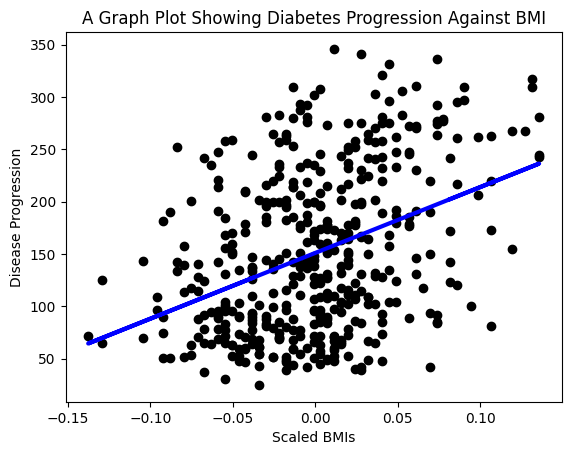

In [12]:
plt.scatter(X, y, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')